# Face detection with Haar Cascade and CNN

- Minor Applied Artificial Intelligence - Semester 2
- Tuesday March 14 2023
- Lecturers: Frank Aldershoff & Michiel Bontenbal


## Contents
1. Face detection with Haar Cascade
2. Face detection with MTCNN

Source:
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

# 1. Face detection with Haar Cascade

## Importeer libraries

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

In [2]:
print(cv.__version__)

4.7.0


## Importeer en toon afbeelding

Zoek een kleuren foto met 5 tot 10 gezichten.

Laad de afbeelding in. Welk datatype heeft de ingeladen afbeelding?


 Laat de foto op het scherm zien. Hoeveel gezichten zie jij?

Type: <class 'numpy.ndarray'>
Shape: (339, 509, 3)


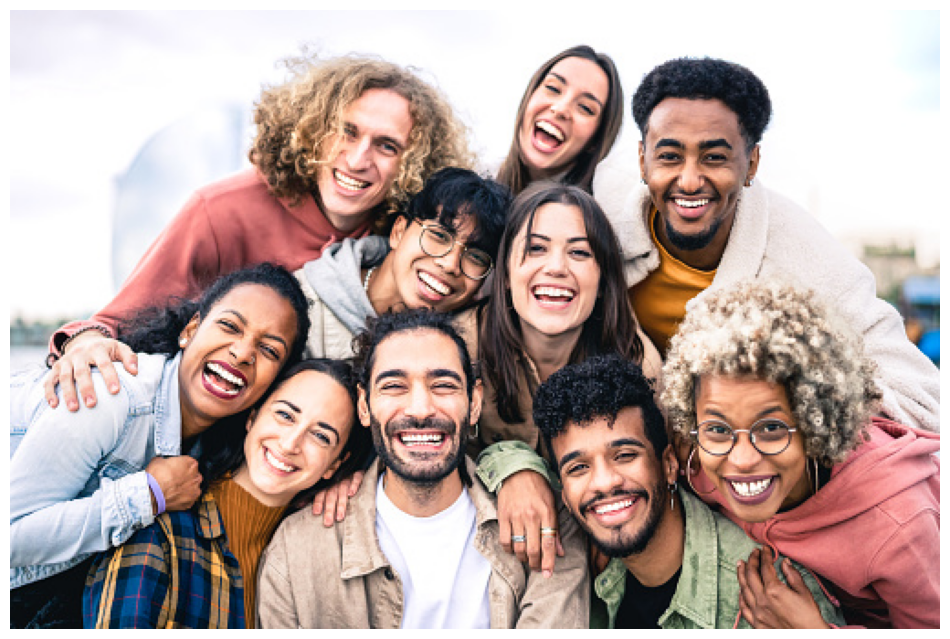

In [5]:
img = plt.imread('faces.jpg') # geen .png, dan gaat het verderop mis

print("Type: {}".format(type(img)))
print("Shape: {}".format(img.shape))

plt.figure(figsize=(12,10))
plt.imshow(img);
plt.axis('off');

In [6]:
#check the datatype
img[0,0,:].dtype

dtype('uint8')

## Initieer detector

Vind online de Haar Cascade classifier: haarcascade_frontalface_default.xml en download deze naar je folder.

In [8]:
#initiate the Haar Cascade classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

#check if this is succesful
print("Is de classifier leeg? --> " + str(face_cascade.empty()))

Is de classifier leeg? --> False


## Zet een kleurenplaatje om in een grijswaarde plaatje.

Als je foto al zwart-wit is dan kun je deze stap overslaan.

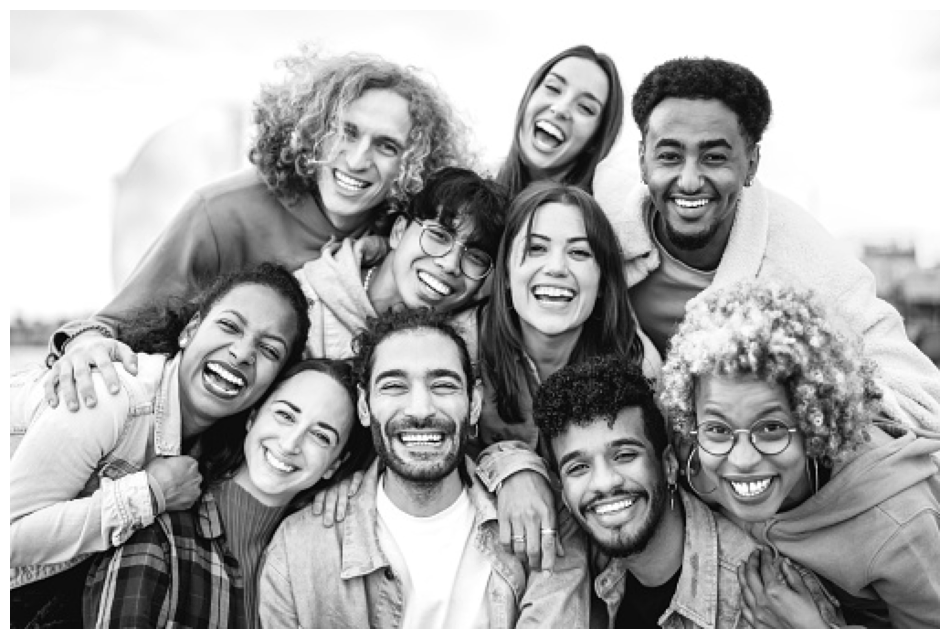

In [12]:
#convert to gray
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(12,10))
plt.imshow(gray, cmap='gray')
plt.axis('off');

## Detecteer gezichten

Bepaal met de classiefier de gezichten in het plaatje.

Hoeveel heb je er gevonden?

In [13]:
haar_faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(10, 10),
        flags=cv.CASCADE_SCALE_IMAGE)

print("Aantal gezichten: " + str(haar_faces.shape[0]))

Aantal gezichten: 7


<b> Dus dat wilt zeggen dat haarcascade niet heel goed presteert. In dit geval mist hij 3 gezichten. Maar het kan zijn dat hij nog meer gezichten mist en dat hij verkeerde dingen als gezicht classificeert.

## Toon rechthoeken rond gezichten

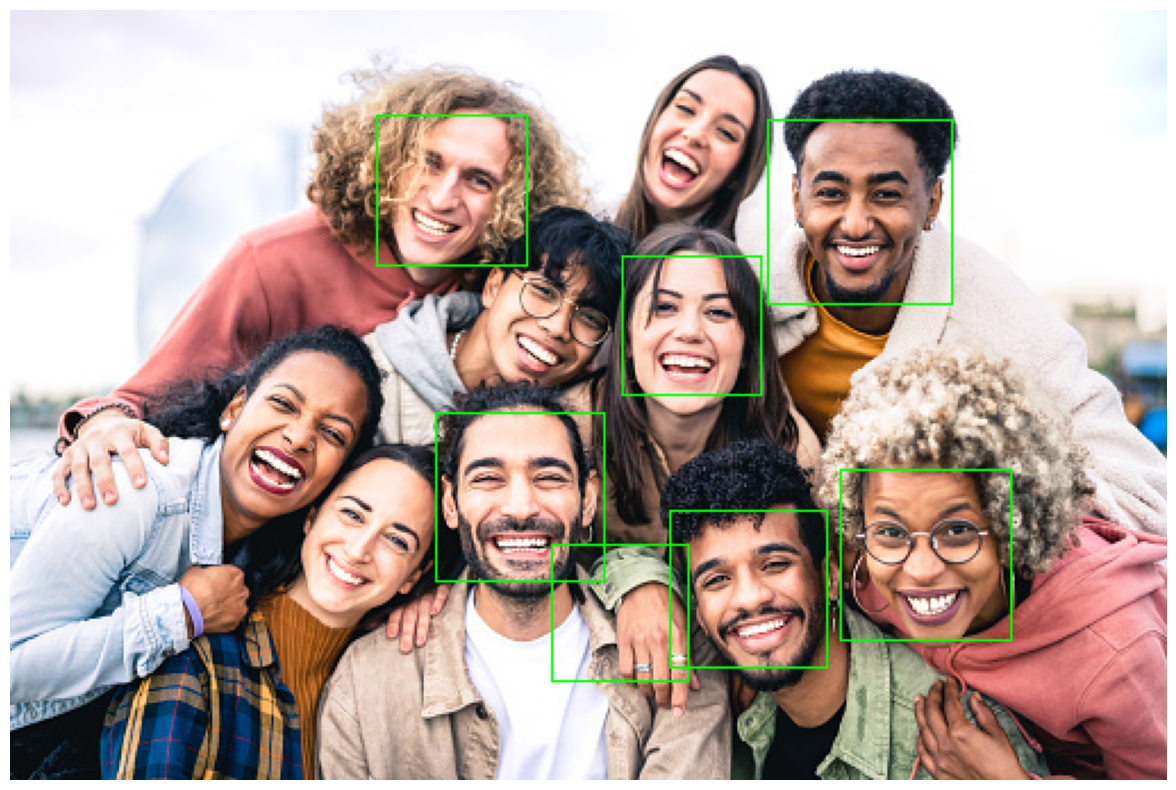

In [15]:
for (x,y,w,h) in haar_faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    
plt.figure(figsize=(15,10))
plt.imshow(img);
plt.axis('off');

<b> Zoals ik eerder verwachtte, hij heeft een hand verkeerd geclassificeerd. 

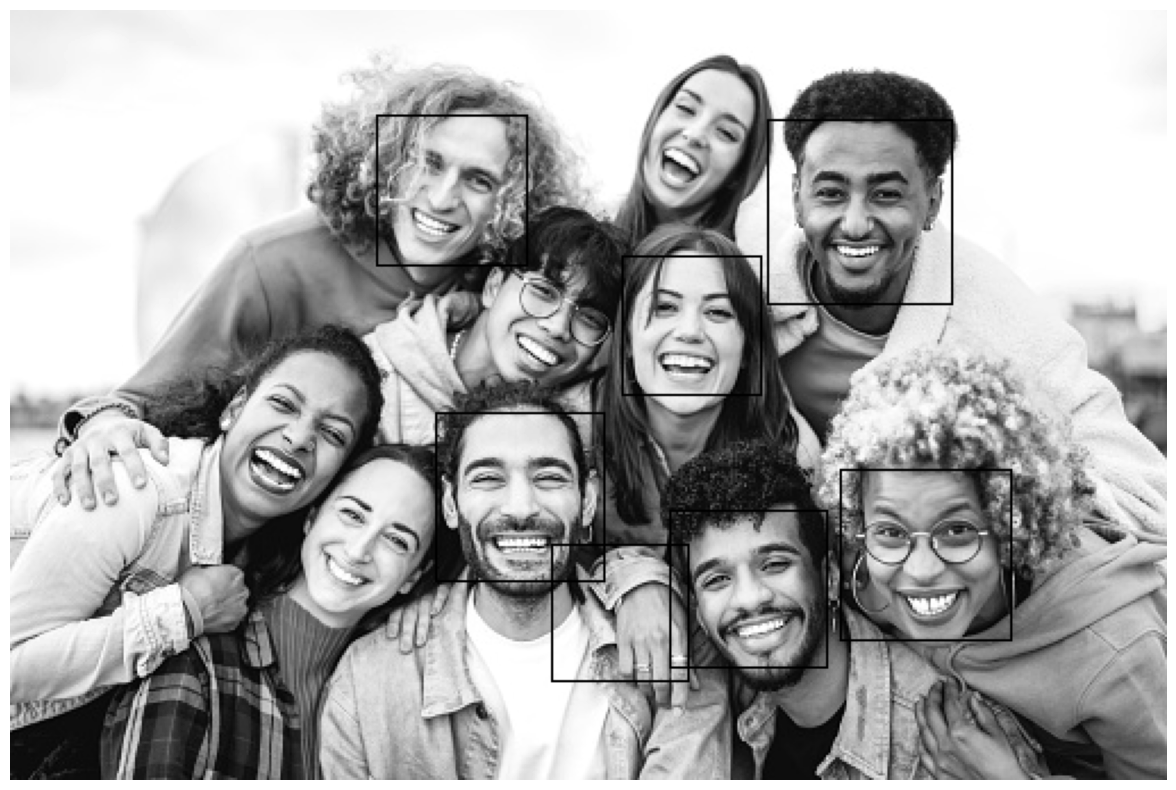

In [16]:
for (x,y,w,h) in haar_faces:
    cv.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),1)
    
plt.figure(figsize=(15,10))
plt.imshow(gray, cmap='gray')
plt.axis('off');

# 2. Face detection with Multi-Task Cascaded Convolutional Neural Network

Install the face detection package: MTCNN.

Source: https://pypi.org/project/mtcnn/

Make sure you've installed tensorflow as well.

In [18]:
%pip install mtcnn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [20]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [22]:
filename = 'faces.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
mtcnn_faces = detector.detect_faces(pixels)

print("Aantal gezichten: " + str(len(mtcnn_faces)))

3/3 [==============================] - 0s 24ms/step
Aantal gezichten: 11


<b> MTCNN heeft 11 gezichten kunnen herkennen. Dus hij werkt te goed, want er zijn maar 10 gezichten in de foto.

In [24]:
#print the values associated with the first face
mtcnn_faces[0]

{'box': [350, 47, 54, 76],
 'confidence': 0.9999997615814209,
 'keypoints': {'left_eye': (361, 80),
  'right_eye': (385, 80),
  'nose': (371, 97),
  'mouth_left': (360, 103),
  'mouth_right': (385, 103)}}

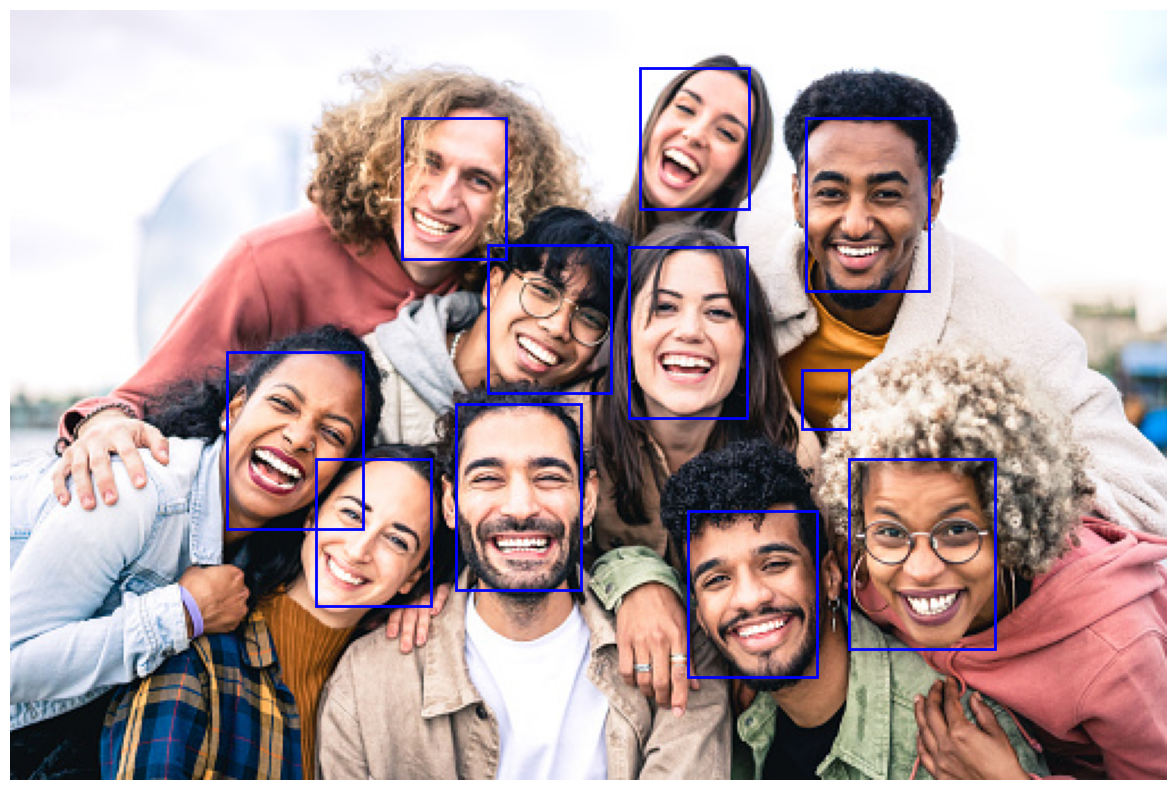

In [25]:
def draw_image_with_boxes(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box'] 
        rect = Rectangle((x, y), width, height, fill=False, color='blue',linewidth=2.0)
        ax.add_patch(rect)
        
    plt.show()


draw_image_with_boxes(pixels, mtcnn_faces)

**OPDRACHT**: evalueer de verschillen tussen de Haar Cascade classifier en de MTCNN detector.

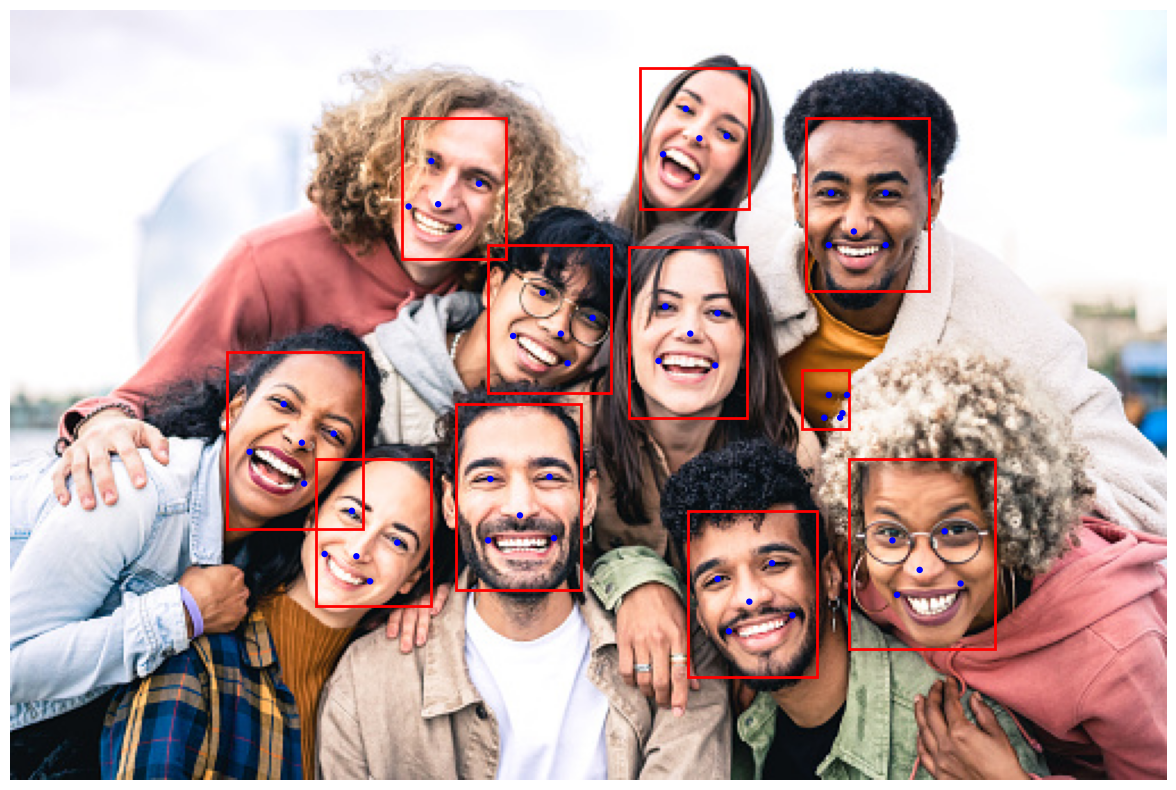

In [26]:
def draw_faces(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red',linewidth=2.0)
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=1.1, color='blue')
            ax.add_patch(dot)
            
    plt.show()

draw_faces(pixels, mtcnn_faces)

<b> 

Ik heb de prestaties van MTCNN en Haarcascade geëvalueerd bij het detecteren van gezichten. 

MTCNN maakt gebruik van keypoints, zoals de ogen, neus en mond, om gezichten te classificeren en te herkennen. Over het algemeen was MTCNN succesvol in het herkennen van de gezichten, maar er was één geval waarbij MTCNN een extra object als een gezicht heeft geclassificeerd.

Aan de andere kant had Haarcascade moeite met het detecteren van enkele gezichten en heeft het zelfs een hand geïdentificeerd als een gezicht. Dit kan te wijten zijn aan het feit dat Haarcascade geen keypoints gebruikt, maar in plaats daarvan is gebaseerd op het detecteren van specifieke kenmerken van een object in een afbeelding. Ondanks deze uitdagingen, kan Haarcascade nuttig zijn voor bepaalde toepassingen waarbij de beeldkwaliteit en belichting relatief consistent zijn.